<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/height_with_two_tanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Height with two tanks 

Name: JM

Date: December 2020

Consider two tanks in series where the flow out of the first tank enters the second tank. Our objetive is to develop a model to describe how the height of liquid in tank 2 changes with time, given the input flowrate $F_{0}(t)$. Assume that the flow out of each tank is a linear function of the height of liquid in the tank ($F_1 = \beta_1 h_1$ and $F_2 = \beta_2 h_2$) and each tank has a constant cross-sectional area. Also assume the density is constant in both tanks. 

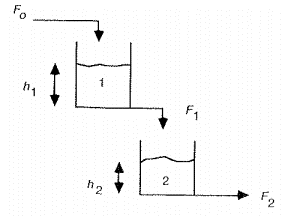

### Material Balance in Tank 1

$$\frac{d(V_1 \rho)}{dt} = F_0 \rho - \beta_1 h_1 \rho$$

$$\frac{d(A_1 h_1 \rho)}{dt} = F_0 \rho - \beta_1 h_1 \rho$$

$$\frac{dh_1 }{dt} = \frac{F_0}{A_1}  - \frac{\beta_1 h_1}{A_1}$$

### Material Balance in Tank 2

$$\frac{d(A_2 h_2 \rho)}{dt} = \beta_1  h_1 \rho - \beta_2 h_2 \rho$$

$$\frac{dh_2}{dt} = \frac{\beta_1  h_1}{A_2} -  \frac{\beta_2 h_2}{A_2}$$

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [118]:
# establish model
def model(s,t,u):

  # state variables
  h1 = s[0]
  h2 = s[1]

  # inputs
  F0 = u

  # parameters
  A1 = p[0]
  A2 = p[1]
  beta1 = p[2]
  beta2 = p[3]

  # material balance tank 1 
  #dh1dt = F0/A1 - beta1*h1/A1
  # material balance tank 2
  #dh2dt = beta1*h1/A1 - beta2*h2/A2

  # material balance tank 1 
  dh1dt = F0/A1 - beta1*h1/A1
  # material balance tank 2
  dh2dt = beta1*h1/A1 - beta2*h2/A2

  return [dh1dt, dh2dt]

In [119]:
model([0.5,0],np.linspace(0,1),0.5)

[0.2475, 0.0025]

In [120]:
# establish parameters
A1 = 2
A2 = 2
beta1 = 0.01
beta2 = 0.005
p = [A1,A2,beta1,beta2]

In [121]:
# initial conditons 
h10 = 2
h20 = 0
s = [h10, h20] 

In [122]:
# integration time
t = np.linspace(0,100,1000)

In [123]:
# input
F0 = 0
u = np.ones(len(t))*F0
u[500:750] = 2

In [124]:
# vectors to save state
h1 = np.ones(len(t))*h10
h2 = np.ones(len(t))*h20

In [125]:
for i in range(len(t)-1):
  # update time span
  ts = [t[i],t[i+1]]
  # solve ODEs
  out = odeint(model,s,t,args=(u[i+1],))
  # save state
  h1[i+1] = out[-1][0] 
  h2[i+1] = out[-1][1]
  # update initial conditions 
  s = out[-1]

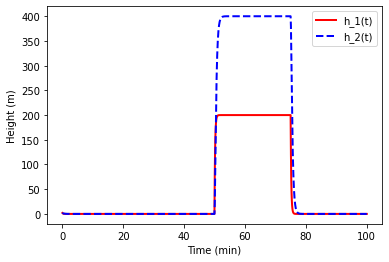

In [126]:
plt.plot(t,h1,"r-",linewidth = 2,label = "h_1(t)")
plt.plot(t,h2,"b--",linewidth = 2,label="h_2(t)")
plt.xlabel("Time (min)")
plt.ylabel("Height (m)")
plt.legend(loc = "best")